## mahyarmohammadi-610398166-HW2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
df = pd.read_csv('D:\\Maternal Health Risk Data Set.csv')
df['RiskLevel'] = df.RiskLevel.apply(lambda x: 2 if x=='high risk' else (1 if x=='mid risk' else 0) )

In [17]:
shuffled = df.sample(frac=1)
train = shuffled.iloc[0:int(len(df)*0.7)]
test = shuffled.iloc[int(len(df)*0.7):]
y_train = train.RiskLevel
x_train = train.drop('RiskLevel',axis=1)
y_test = test.RiskLevel
x_test = test.drop('RiskLevel',axis=1)

In [10]:
def get_accuracy(model,x_train,y_train,x_test,y_test):
    score1 = cross_val_score(model, x_train, y_train, cv=5)
    score1 = np.mean(score1)
    model2 = model.fit(x_train, y_train)
    score2 = sum(model2.predict(x_train)==y_train)/len(y_train)
    score3 = sum(model2.predict(x_test)==y_test)/len(y_test)
    
    return pd.DataFrame({'cross_val_score':[score1],
                         'train_score':[score2],'test_score':[score3]})

In [11]:
def get_conf_mat(model,x_train,y_train,x_test,y_test):
    model2 = model.fit(x_train, y_train)
    return confusion_matrix(y_test,model2.predict(x_test))

In [ ]:
from sklearn import tree
max_score = 0
for i in range(0,15):
    for j in range(1,35):
        model = tree.DecisionTreeClassifier(random_state=i, max_depth=j)
        score = cross_val_score(model, x_train, y_train, cv=5)
        score = np.mean(score)
        if(score>max_score):
            max_score = score
            max_i = i
            max_j = j

In [87]:
model = tree.DecisionTreeClassifier(random_state=max_i, max_depth=max_j)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.774368,0.926657,0.868852


confusion matrix:
 [[101  12   1]
 [ 16  82   5]
 [  3   3  82]]


In [ ]:
from sklearn import svm
max_score = 0
for C in range(1,10):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for rand_state in range(10):
            model = svm.SVC(kernel=kernel, C=C, random_state=rand_state)
            score = cross_val_score(model, x_train, y_train, cv=5)
            score = np.mean(score)
            if(score>max_score):
                max_score = score
                max_C = C
                max_kernel = kernel
                max_rand_state = rand_state

In [117]:
model = svm.SVC(kernel=max_kernel, C=max_C, random_state=max_rand_state)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.662891,0.669958,0.688525


confusion matrix:
 [[101  12   1]
 [ 51  38  14]
 [  8   9  71]]


In [112]:
from sklearn.neighbors import KNeighborsClassifier
max_score = 0
for p in [1,2]:
    for leaf_size in range(2,30):
        for weight in ['uniform','distance']:
            for n_neighbors in range(2,10):
                model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                     weights=weight,
                                     leaf_size=leaf_size,p=p)
                score = cross_val_score(model, x_train, y_train, cv=5)
                score = np.mean(score)
                if(score>max_score):
                    max_score = score
                    max_n_neighbors = n_neighbors
                    max_weight = weight
                    max_leaf_size = leaf_size
                    max_p = p

In [113]:
model = KNeighborsClassifier(n_neighbors=max_n_neighbors,
                                     weights=max_weight,
                                     leaf_size=max_leaf_size,p=max_p)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.756048,0.926657,0.852459


confusion matrix:
 [[102  10   2]
 [ 16  82   5]
 [  3   9  76]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
for n_estimators in range(10,110,10):
    for criterion in ['gini','entropy']:
        for max_depth in [None,1,3,5,10,20]:
            model = RandomForestClassifier(n_estimators=n_estimators,
                                   criterion=criterion, max_depth=max_depth)
            score = cross_val_score(model, x_train, y_train, cv=5)
            score = np.mean(score)
            if(score>max_score):
                max_score = score
                max_n_estimators = n_estimators
                max_criterion = criterion
                max_max_depth = max_depth

In [115]:
model = RandomForestClassifier(n_estimators=max_n_estimators,
                                   criterion=max_criterion, max_depth=max_max_depth)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.801129,0.905501,0.842623


confusion matrix:
 [[101  12   1]
 [ 23  73   7]
 [  3   6  79]]


so DecisionTreeClassifier>KNeighborsClassifier>RandomForestClassifier>SVM in predicting data

In [2]:
df = pd.read_csv('D:\\pd_speech_features.csv')
df.columns = df.loc[0]
df = df.loc[1:].reset_index(drop=True)
df = df.drop('id',axis=1)
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [3]:
shuffled = df.sample(frac=1)
train = shuffled.iloc[0:int(len(df)*0.7)]
test = shuffled.iloc[int(len(df)*0.7):]
y_train = train['class'].astype(int)
x_train = train.drop('class',axis=1)
y_test = test['class'].astype(int)
x_test = test.drop('class',axis=1)

In [155]:
#test if model output 1 always
print(sum(y_test==1)*100/len(y_test))
print(sum(y_train==1)*100/len(y_train))
print('so 70% of data is 1 so our predictor should wrk better than this')

71.80616740088105
75.80340264650283
so 70% of data is 1 so our predictor should wrk better than this


In [168]:
model = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.843127,0.924386,0.819383


confusion matrix:
 [[ 31  33]
 [  8 155]]


In [172]:
model = svm.SVC(kernel='poly', C=5)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.761815,0.761815,0.722467


confusion matrix:
 [[  1  63]
 [  0 163]]


In [186]:
model = KNeighborsClassifier(n_neighbors=10,leaf_size=10,p=2)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.758077,0.79017,0.722467


confusion matrix:
 [[ 18  46]
 [ 17 146]]


In [190]:
model = RandomForestClassifier(n_estimators=40,
                                   criterion='gini', max_depth=10)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.856298,0.99811,0.84141


confusion matrix:
 [[ 37  27]
 [  7 156]]


as we see, data have many featurs so we can't test it many times to find best parameters. so we use PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x = pd.DataFrame(pca.fit_transform(df.drop('class',axis=1)))
y = df['class']
x['class'] = y
x

,0,1,2,3,4,class
0,-5.815816e+09,4.701391e+06,-6.210264e+05,-5.381659e+05,-2.002537e+06,1
1,-6.029399e+09,4.610122e+06,-4.198081e+05,-5.848704e+05,-2.241594e+06,1
2,-6.159184e+09,5.578720e+06,-4.115108e+05,-5.529822e+05,-2.333541e+06,1
3,-7.197145e+09,5.943199e+07,1.355807e+06,5.389349e+06,4.936082e+05,1
4,-6.423357e+09,8.714129e+07,1.791626e+07,8.141098e+06,-1.397339e+06,1
...,...,...,...,...,...,...
751,4.103152e+09,1.542737e+06,-3.208364e+06,-1.147580e+06,2.075232e+06,0
752,2.497869e+09,2.178636e+07,-4.537999e+06,2.039509e+06,3.866992e+06,0
753,2.219689e+09,-1.174242e+07,-1.667810e+06,-2.526730e+05,1.009783e+06,0
754,-7.657541e+08,-1.993053e+06,-2.450060e+06,-8.769334e+05,1.048598e+06,0


In [24]:
shuffled = x.sample(frac=1)
train = shuffled.iloc[0:int(len(df)*0.7)]
test = shuffled.iloc[int(len(df)*0.7):]
y_train = train['class'].astype(int)
x_train = train.drop('class',axis=1)
y_test = test['class'].astype(int)
x_test = test.drop('class',axis=1)

In [25]:
x_train

,0,1,2,3,4
346,-2.402444e+09,3.194348e+06,-2.409360e+06,-7.441726e+05,6.213116e+05
301,-5.303177e+09,3.987502e+06,-7.037378e+05,-8.219516e+05,-1.545848e+06
632,-6.818158e+09,6.464755e+06,1.139571e+05,-5.176585e+05,-3.093502e+06
453,-1.494902e+09,-3.394425e+06,-2.374074e+06,1.059653e+05,8.996537e+05
2,-6.159184e+09,5.578720e+06,-4.115108e+05,-5.529822e+05,-2.333541e+06
...,...,...,...,...,...
52,3.227368e+09,7.811277e+06,-4.223863e+06,-2.600096e+05,2.581411e+06
619,4.857470e+09,6.332182e+05,-3.312167e+06,-1.080745e+06,1.914146e+06
158,-1.969376e+09,1.954374e+06,-2.634983e+06,-2.778123e+05,8.307588e+05
159,-1.125500e+09,-8.218081e+05,-2.612246e+06,-4.086373e+05,1.035382e+06


In [26]:
from sklearn import tree
max_score = 0
for i in range(0,15):
    for j in range(1,35):
        model = tree.DecisionTreeClassifier(random_state=i, max_depth=j)
        score = cross_val_score(model, x_train, y_train, cv=5)
        score = np.mean(score)
        if(score>max_score):
            max_score = score
            max_i = i
            max_j = j
model = tree.DecisionTreeClassifier(random_state=max_i, max_depth=max_j)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.744816,0.748582,0.740088


confusion matrix:
 [[  0  59]
 [  0 168]]


In [27]:
from sklearn import svm
max_score = 0
for C in range(1,10):
    model = svm.SVC(C=C)
    score = cross_val_score(model, x_train, y_train, cv=5)
    score = np.mean(score)
    if(score>max_score):
        max_score = score
        max_C = C
model = svm.SVC(C=max_C)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.769398,0.769376,0.731278


confusion matrix:
 [[  7  52]
 [  9 159]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
max_score = 0
for p in [1,2]:
    for leaf_size in range(2,30):
        for weight in ['uniform','distance']:
            for n_neighbors in range(2,10):
                model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                     weights=weight,
                                     leaf_size=leaf_size,p=p)
                score = cross_val_score(model, x_train, y_train, cv=5)
                score = np.mean(score)
                if(score>max_score):
                    max_score = score
                    max_n_neighbors = n_neighbors
                    max_weight = weight
                    max_leaf_size = leaf_size
                    max_p = p
model = KNeighborsClassifier(n_neighbors=max_n_neighbors,
                                     weights=max_weight,
                                     leaf_size=max_leaf_size,p=max_p)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.763684,0.793951,0.722467


confusion matrix:
 [[ 13  46]
 [ 17 151]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
max_score=0
for n_estimators in range(10,110,10):
    for criterion in ['gini','entropy']:
        for max_depth in [None,1,3,5,10,20]:
            model = RandomForestClassifier(n_estimators=n_estimators,
                                   criterion=criterion, max_depth=max_depth)
            score = cross_val_score(model, x_train, y_train, cv=5)
            score = np.mean(score)
            if(score>max_score):
                max_score = score
                max_n_estimators = n_estimators
                max_criterion = criterion
                max_max_depth = max_depth
model = RandomForestClassifier(n_estimators=max_n_estimators,
                                   criterion=max_criterion, max_depth=max_max_depth)
display(get_accuracy(model,x_train,y_train,x_test,y_test))
print('confusion matrix:\n',get_conf_mat(model,x_train,y_train,x_test,y_test))

,cross_val_score,train_score,test_score
0,0.769416,0.820416,0.731278


confusion matrix:
 [[  4  55]
 [  6 162]]


as we can see, we lose a little accuracy when using PCA but modeling is much faster and we can set parameters that work very well 

In [39]:
def model_accr(model,x_train,y_train,x_test,y_test):
    model2 = model.fit(x_train, y_train)
    score = sum(model2.predict(x_test)==y_test)/len(y_test)
    return score

In [30]:
def get_for_pca(n):
    pca = PCA(n_components=n)
    x = pd.DataFrame(pca.fit_transform(df.drop('class',axis=1)))
    y = df['class']
    x['class'] = y
    shuffled = x.sample(frac=1)
    train = shuffled.iloc[0:int(len(df)*0.7)]
    test = shuffled.iloc[int(len(df)*0.7):]
    y_train = train['class'].astype(int)
    x_train = train.drop('class',axis=1)
    y_test = test['class'].astype(int)
    x_test = test.drop('class',axis=1)
    
    return y_train, x_train, y_test, x_test

In [40]:
Tree = []
SVM = []
nei = []
forest = []
for n in [3,5,10,15,20,30,50]:
    y_train, x_train, y_test, x_test = get_for_pca(n)
    model1 = tree.DecisionTreeClassifier(random_state=max_i, max_depth=max_j)
    model2 = svm.SVC(C=max_C)
    model3 = KNeighborsClassifier(n_neighbors=max_n_neighbors,
                                         weights=max_weight,
                                         leaf_size=max_leaf_size,p=max_p)
    model4 = RandomForestClassifier(n_estimators=max_n_estimators,
                                       criterion=max_criterion, max_depth=max_max_depth)
    Tree.append(model_accr(model1,x_train,y_train,x_test,y_test))
    SVM.append(model_accr(model2,x_train,y_train,x_test,y_test))
    nei.append(model_accr(model3,x_train,y_train,x_test,y_test))
    forest.append(model_accr(model4,x_train,y_train,x_test,y_test))

In [44]:
df2 = pd.DataFrame({'DecisionTree':Tree,'SVM':SVM,'KNeighbors':nei,'RandomForest':forest},
             index=[3,5,10,15,20,30,50])
df2

,DecisionTree,SVM,KNeighbors,RandomForest
3,0.696035,0.748899,0.704846,0.740088
5,0.770925,0.797357,0.766520,0.806167
10,0.735683,0.757709,0.770925,0.757709
15,0.762115,0.744493,0.753304,0.788546
20,0.788546,0.810573,0.766520,0.823789
30,0.770925,0.757709,0.757709,0.814978
50,0.748899,0.718062,0.718062,0.797357


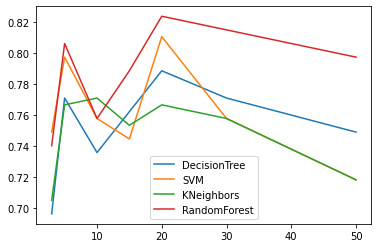

In [46]:
df2.plot()

as we can see, feature increasing not always came with more efficency. as 5 is the best number for PCA parameters in all methods